## Seminar 1: Fun with Word Embeddings

Today we gonna play with word embeddings: train our own little embeddings, load one from gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.

In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

In [59]:
import numpy as np

with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an NLP task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and smiles attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many NLP tasks like tokenization, stemming or part-of-speech tagging.

In [4]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [63]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = []
for line in data:
    s = tokenizer.tokenize(line.lower())
    data_tok.append(s)

In [15]:
(data[0], [' '.join(row) for row in data_tok[:1]])

("Can I get back with my ex even though she is pregnant with another guy's baby?\n",
 ["can i get back with my ex even though she is pregnant with another guy ' s baby ?"])

In [12]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [13]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fasttext that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another nlp library that features many vector-based models incuding word2vec.

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,    # embedding vector size
                 min_count=5,       # consider words that occured at least 5 times
                 window=5).wv       # define context as a 5-word window around the target word

In [19]:
# now you can get word vectors !
model.get_vector('anything')

array([-2.10164   ,  2.220828  ,  2.0363925 ,  2.4184728 ,  2.861858  ,
        2.5599196 ,  2.050234  , -2.3996403 ,  0.41877556,  1.9710646 ,
       -2.3835316 ,  1.5813262 ,  4.0904827 ,  2.396746  ,  2.6763177 ,
       -0.46968767,  0.3509693 , -1.6478586 ,  1.233212  , -2.2046425 ,
       -2.288346  , -0.58321774, -1.4769645 , -2.4334784 ,  0.3328001 ,
       -2.3390775 , -1.1576319 , -1.1727097 ,  1.4244483 ,  1.6396513 ,
       -2.331508  ,  0.43520224], dtype=float32)

In [20]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.9483833909034729),
 ('cheese', 0.942517101764679),
 ('sauce', 0.9262259006500244),
 ('pasta', 0.9261834025382996),
 ('flour', 0.9143175482749939),
 ('potato', 0.9130464792251587),
 ('butter', 0.9126452207565308),
 ('corn', 0.899867832660675),
 ('beans', 0.8983513116836548),
 ('fruit', 0.8952239155769348)]

In [21]:
model.most_similar('girl')

[('guy', 0.97661954164505),
 ('woman', 0.8977738618850708),
 ('boy', 0.8960057497024536),
 ('person', 0.8654511570930481),
 ('girlfriend', 0.8572505712509155),
 ('boyfriend', 0.8338262438774109),
 ('man', 0.8281047940254211),
 ('friend', 0.8221569657325745),
 ('kid', 0.8101940155029297),
 ('crush', 0.8065484166145325)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: wikipedia articles or twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no sms required, promise).

In [22]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [24]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

In [30]:
model.most_similar(positive=["family"], negative=["child"])

[('flia', 0.457474946975708),
 ('familytime', 0.42032554745674133),
 ('lepak', 0.40482789278030396),
 ('familia', 0.40300020575523376),
 ('mydin', 0.3998100757598877),
 ('steamboat', 0.39942023158073425),
 ('sunway', 0.3994123041629791),
 ('melaka', 0.39867717027664185),
 ('familiy', 0.39831778407096863),
 ('fambam', 0.3936992287635803)]

### Visualizing word vectors

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [31]:
words = model.index_to_key[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [35]:
# for each word, compute it's vector with model
word_vectors = np.array([model.get_vector(w) for w in words])

In [37]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

In [38]:
word_vectors

array([[ 0.63006 ,  0.65177 ,  0.25545 , ...,  0.55096 ,  0.64706 ,
        -0.6093  ],
       [ 0.18205 , -0.048483,  0.23966 , ..., -0.3358  ,  0.18884 ,
        -0.40786 ],
       [ 1.0674  ,  0.45716 ,  0.51463 , ...,  0.13974 ,  0.76487 ,
        -0.17314 ],
       ...,
       [ 0.11065 , -0.040876,  0.2586  , ..., -0.74773 ,  0.306   ,
         0.37911 ],
       [ 0.30491 , -0.89558 , -0.46538 , ...,  0.73649 ,  1.3842  ,
         0.99976 ],
       [-0.43051 ,  0.56302 ,  0.38305 , ..., -0.3222  ,  0.32782 ,
         0.51519 ]], dtype=float32)

#### Linear projection: PCA

The simplest linear dimensionality reduction method is __P__rincipial __C__omponent __A__nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
# (if feature units differ greatly in their orders, it is highly recommended to standardize them before doing PCA, not after)

pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

scaler = StandardScaler()
word_vectors_pca = scaler.fit_transform(word_vectors_pca)

# and maybe MORE OF YOUR CODE here :)

In [43]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [ ]:
!pip install bokeh

In [48]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [49]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1053', ...)

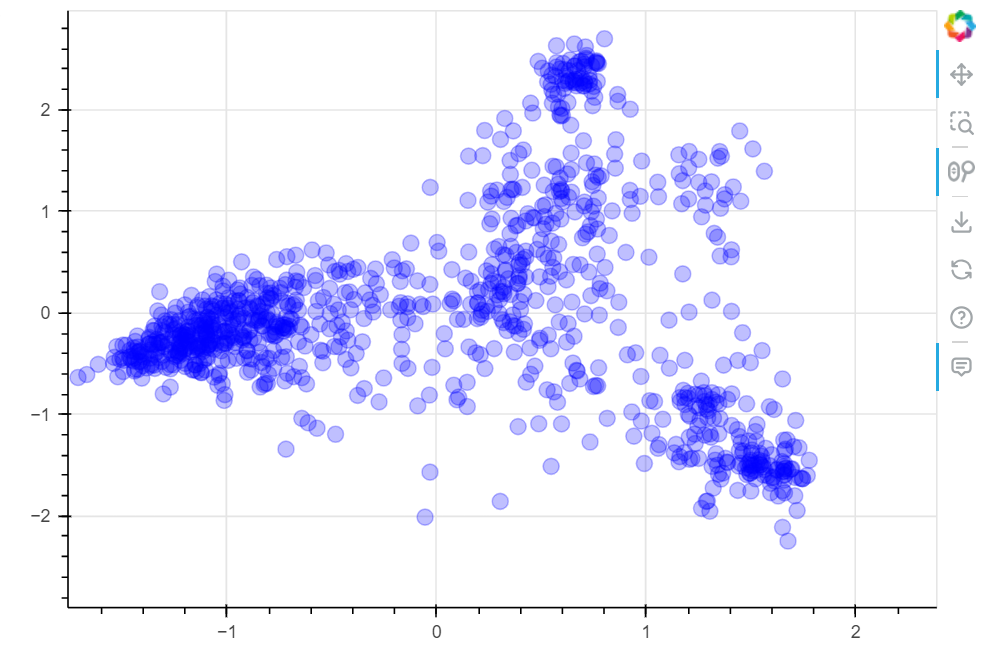

### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

### **Normalize after** t-SNE

In [65]:
from sklearn.manifold import TSNE

# map word vectors onto 2d plane with TSNE. hint: don't panic it may take a minute or two to fit.
# normalize them as just lke with pca

tsne = TSNE(n_components=2)
word_tsne = tsne.fit_transform(word_vectors)

In [66]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1249', ...)

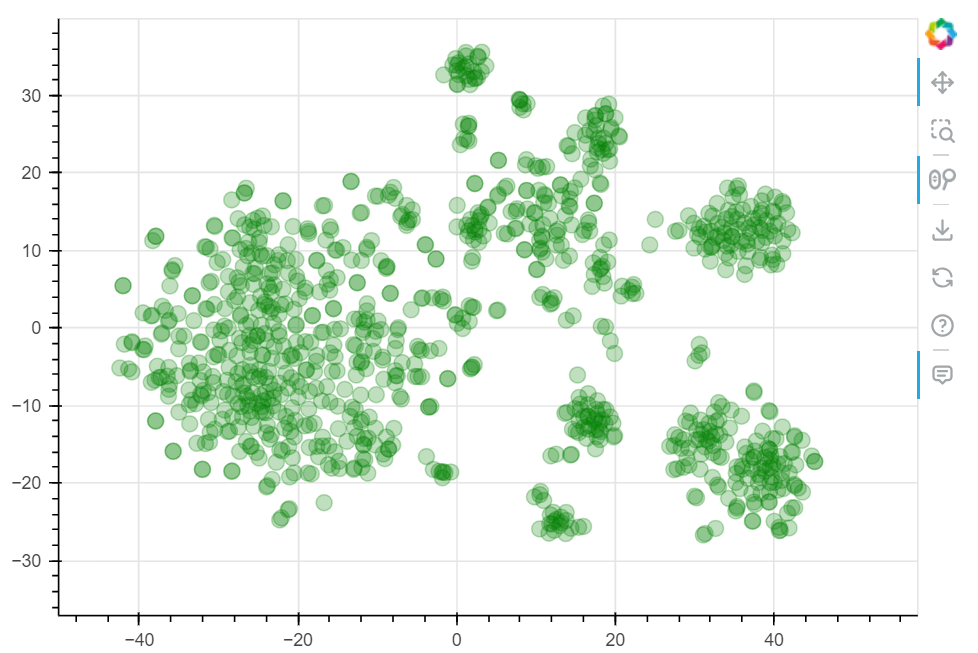

### **Normalize before** t-SNE

In [53]:
from sklearn.manifold import TSNE

# map word vectors onto 2d plane with TSNE. hint: don't panic it may take a minute or two to fit.
# normalize them as just lke with pca

scaler = StandardScaler()
word_vectors_normed = scaler.fit_transform(word_vectors)

tsne = TSNE(n_components=2)
word_tsne = tsne.fit_transform(word_vectors_normed)

In [51]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1102', ...)

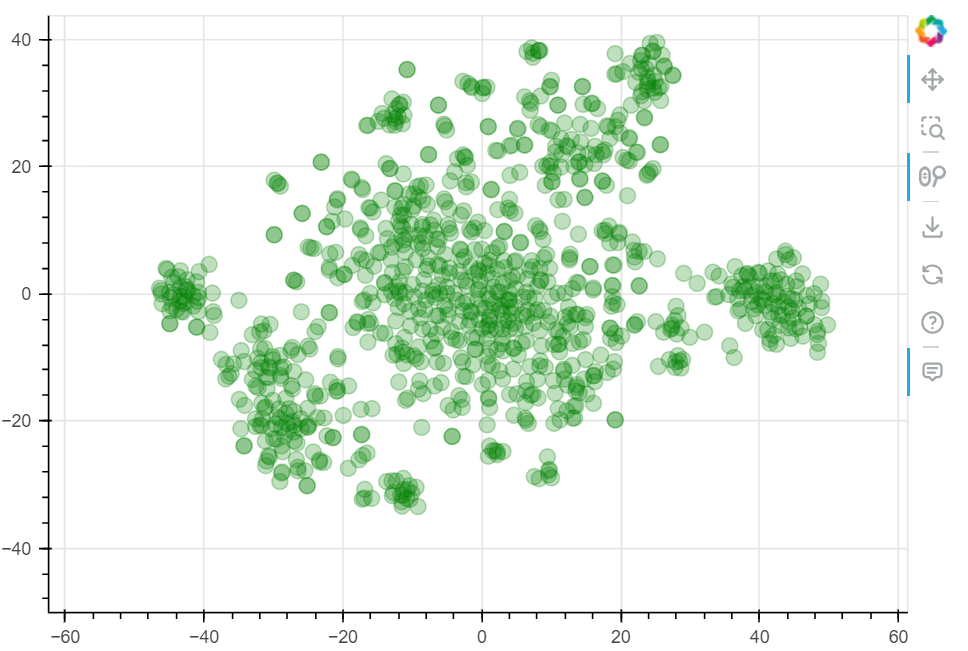

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artefacts.

Let's try this new hammer on our data!


In [67]:
np.zeros(9)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

100

In [91]:
def get_phrase_embedding(phrase, model):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')
    processed_phrase = tokenizer.tokenize(phrase.lower())
    N = 0
    for i, w in enumerate(processed_phrase):
        if w in model:
            vector += model.get_vector(w)
            N += 1
    if N == 0: return vector
    return vector/N

In [82]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...", model)

assert np.allclose(vector[::10],
                   np.array([ 0.31807372, -0.02558171,  0.0933293 , -0.1002182 , -1.0278689 ,
                             -0.16621883,  0.05083408,  0.17989802,  1.3701859 ,  0.08655966],
                              dtype=np.float32))

In [85]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(phrase, model) for phrase in chosen_phrases])

In [86]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [87]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE().fit_transform(phrase_vectors)

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [88]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1298', ...)

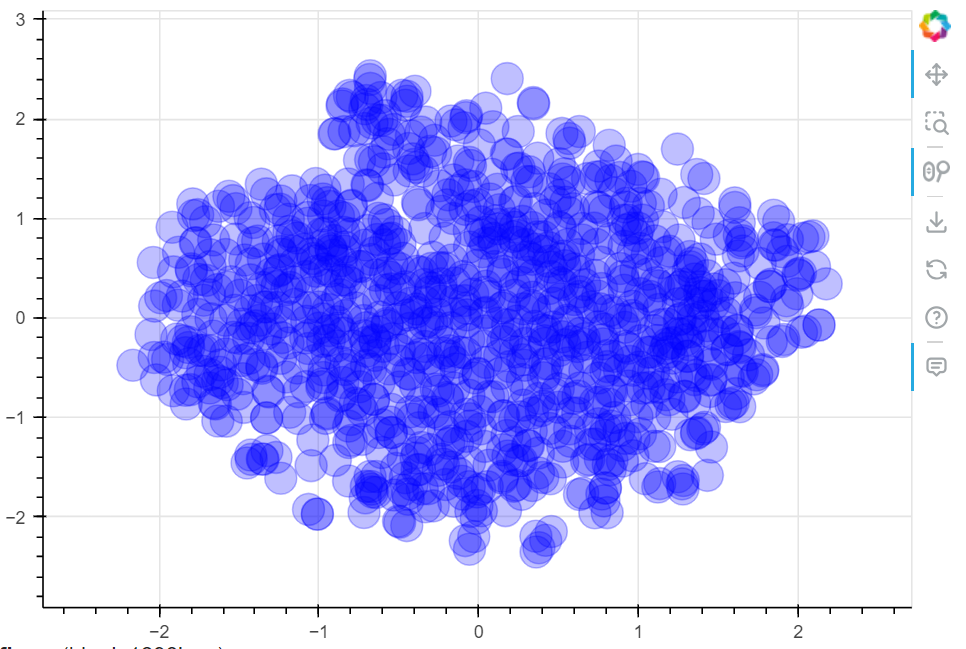

Finally, let's build a simple "similar question" engine with phrase embeddings we've built.

In [145]:
# compute vector embedding for all lines in data
data_vectors = np.array([get_phrase_embedding(l, model) for l in data])

In [149]:
from sklearn.metrics.pairwise import cosine_similarity

def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    query_embdng = get_phrase_embedding(query, model)
    similarities = [cosine_similarity(query_embdng.reshape(1, -1), emdng.reshape(1, -1))[0][0] for emdng in data_vectors]
    top_k_indices = np.argsort(similarities)[::-1][:k]
    return [data[i] for i in top_k_indices]

In [151]:
results = find_nearest(query="How do i enter the matrix?", k=10)

print(''.join(results))

How do I get to the dark web?
What should I do to enter hollywood?
How do I use the Greenify app?
What can I do to save the world?
How do I win this?
How do I think out of the box? How do I learn to think out of the box?
How do I find the 5th dimension?
How do I use the pad in MMA?
How do I estimate the competition?
What do I do to enter the line of event management?



In [152]:
assert len(results) == 10 and isinstance(results[0], str)
assert results[0] == 'How do I get to the dark web?\n'
assert results[3] == 'What can I do to save the world?\n'

In [153]:
find_nearest(query="How does Trump?", k=10)

['What does Donald Trump think about Israel?\n',
 'What books does Donald Trump like?\n',
 'What does India think of Donald Trump?\n',
 'What does Donald Trump think of India?\n',
 'What does Donald Trump think of China?\n',
 'What does Donald Trump think about Pakistan?\n',
 'What companies does Donald Trump own?\n',
 'What does Dushka Zapata think about Donald Trump?\n',
 'How does it feel to date Ivanka Trump?\n',
 'What does salesforce mean?\n']

In [154]:
find_nearest(query="Why don't i ask a question myself?", k=10)

["Why don't I get a date?\n",
 "Why do you always answer a question with a question? I don't, or do I?\n",
 "Why can't I ask a question anonymously?\n",
 "Why don't I get a girlfriend?\n",
 "Why don't I have a boyfriend?\n",
 "I don't have no question?\n",
 "Why can't I take a joke?\n",
 "Why don't I ever get a girl?\n",
 "Can I ask a girl out that I don't know?\n",
 "Why don't I have a girlfriend?\n"]

__Now what?__
* Try running TSNE on all data, not just 1000 phrases
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText](https://github.com/facebookresearch/fastText) embeddings
* Optimize `find_nearest` with locality-sensitive hashing: use [nearpy](https://github.com/pixelogik/NearPy) or `sklearn.neighbors`.